In [118]:
import pandas as pd
import numpy as np
import warnings
import matplotlib.pyplot as plt
import seaborn as sns

plt.rcParams['font.family'] ='Malgun Gothic' 
plt.rcParams['axes.unicode_minus'] =False

warnings.filterwarnings('ignore')

In [119]:
# datasets = ['convenience','crim','income','people','safe','traffic']

convenience = pd.read_csv('convenience.csv',encoding = 'cp949')
crime = pd.read_csv('crime.csv',encoding='cp949')
income = pd.read_csv('income.csv',encoding='cp949')
people = pd.read_csv('people.csv',encoding='cp949')
safe = pd.read_csv('safe.csv',encoding='cp949')
traffic = pd.read_csv('traffic.csv',encoding='utf-8')
noise = pd.read_csv('noise.csv',encoding='cp949')
# display(convenience.tail(1),income.tail(1), people.tail(1), safe.tail(1), traffic.tail(1), crime.tail(1),noise.tail(1))

# 편의시설

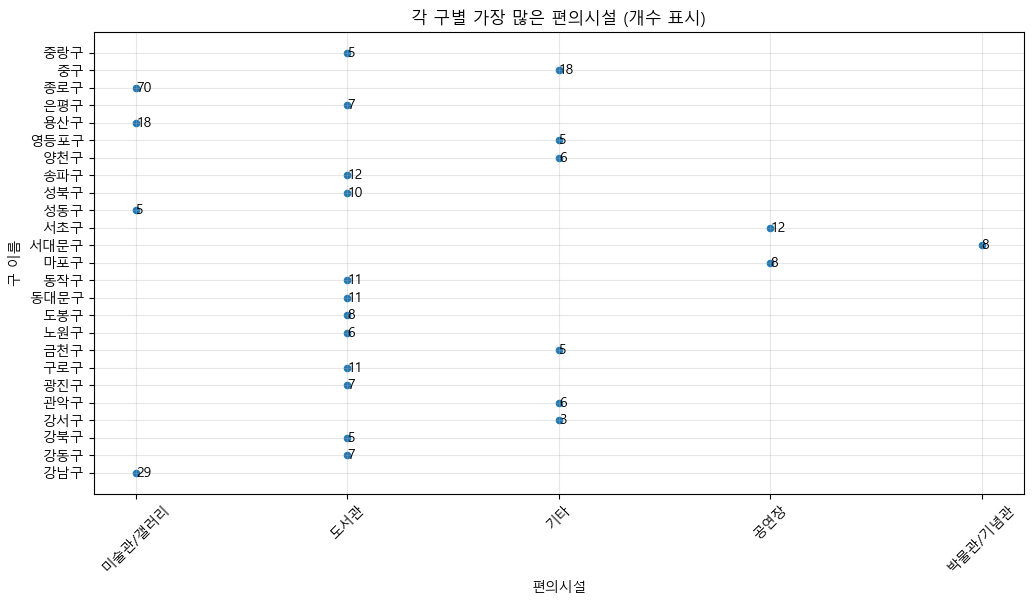

In [120]:
con = convenience.T
con.columns = con.loc[con.index[0],:]
con2 = con.drop(con.index[0],axis=0)
con2

# con2: 편의시설 x 구
con2.columns.name = None

# 각 구별 최댓값(편의시설 이름)
max_facilities = con2.idxmax()

# 각 구별 최댓값의 개수
max_counts = con2.max()

plt.figure(figsize=(12, 6))
plt.scatter(max_facilities.values, max_facilities.index, s=20)

# 점 위에 개수 표시
for gu, fac, count in zip(max_facilities.index, max_facilities.values, max_counts.values):
    plt.text(fac, gu, f"{count}", fontsize=10, ha="left", va='center')

plt.xlabel("편의시설")
plt.ylabel("구 이름")
plt.title("각 구별 가장 많은 편의시설 (개수 표시)")
plt.xticks(rotation=45)
plt.grid(True, alpha=0.3)
plt.show()


# 유동인구

In [121]:
peo = people.sort_values(by='총유동인구',ascending=False)

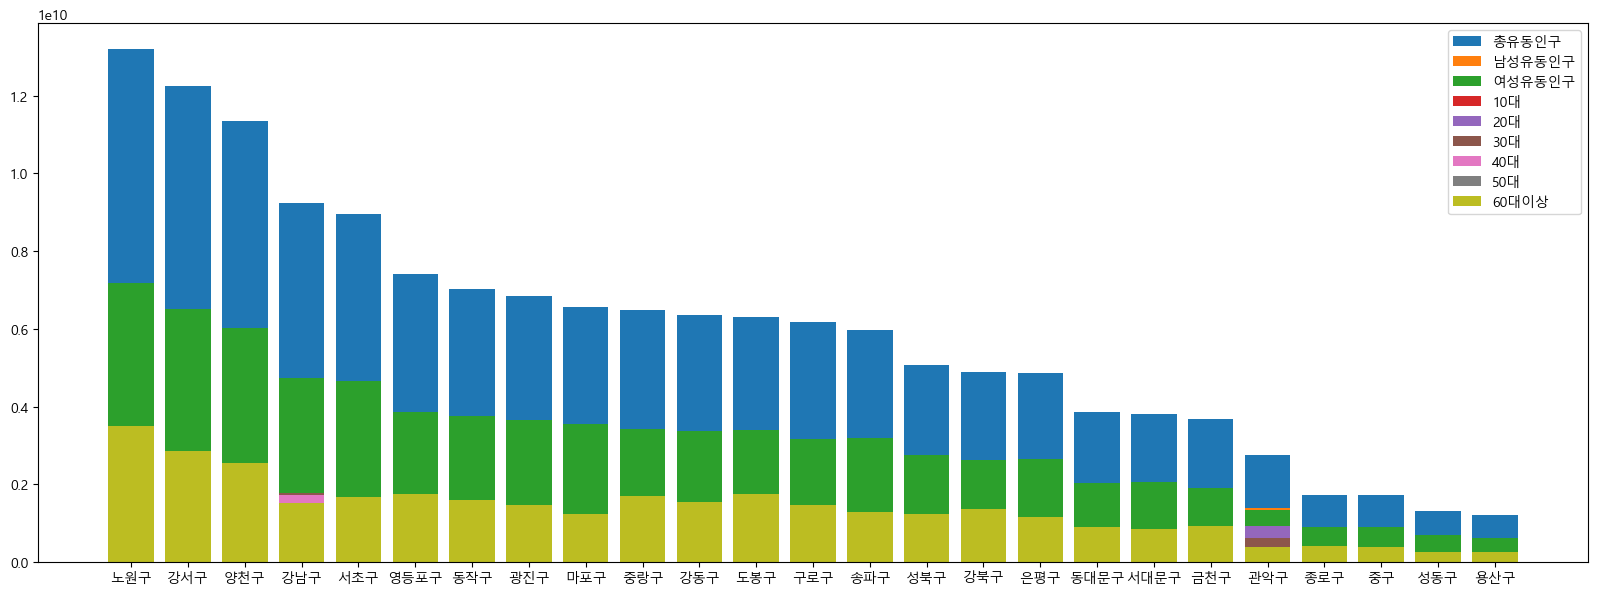

In [ ]:
var = peo.columns[1:]
plt.figure(figsize=(20,7))
for v in var:
    plt.bar(peo['시군구명'],peo[f'{v}'],label=f'{v}')

plt.legend()
plt.show()

# 소득

In [123]:
income.tail()

,시군구명,월평균소득,총지출,식료품비,의류비,의료비,교육비,교통비,생활용품비,여가비,유흥비,식비,기타
20,용산구,1384190178,2184771761000,217394767000,64512062000,76126650000,81971456000,39424762000,25703236000,86717564000,545033312000,593072970000,454814982000
21,은평구,2255386536,4876609994000,953995475000,192182187000,80218396000,1319445162000,182576395000,219273226000,167132990000,526757880000,197279067000,1037749216000
22,종로구,1679793711,2109087027000,245877346000,53961342000,9253632000,251210619000,25354519000,58964582000,34548577000,102321958000,867235305000,460359147000
23,중구,1159364286,35107158600000,366230831000,77848695000,36384103000,164264791000,147054904000,15891754000,42052594000,33504850106000,266855849000,485724973000
24,중랑구,2916518766,3517065922000,1039610572000,67242738000,111485520000,519245904000,380688298000,127582838000,146127132000,204915556000,143875962000,776291402000


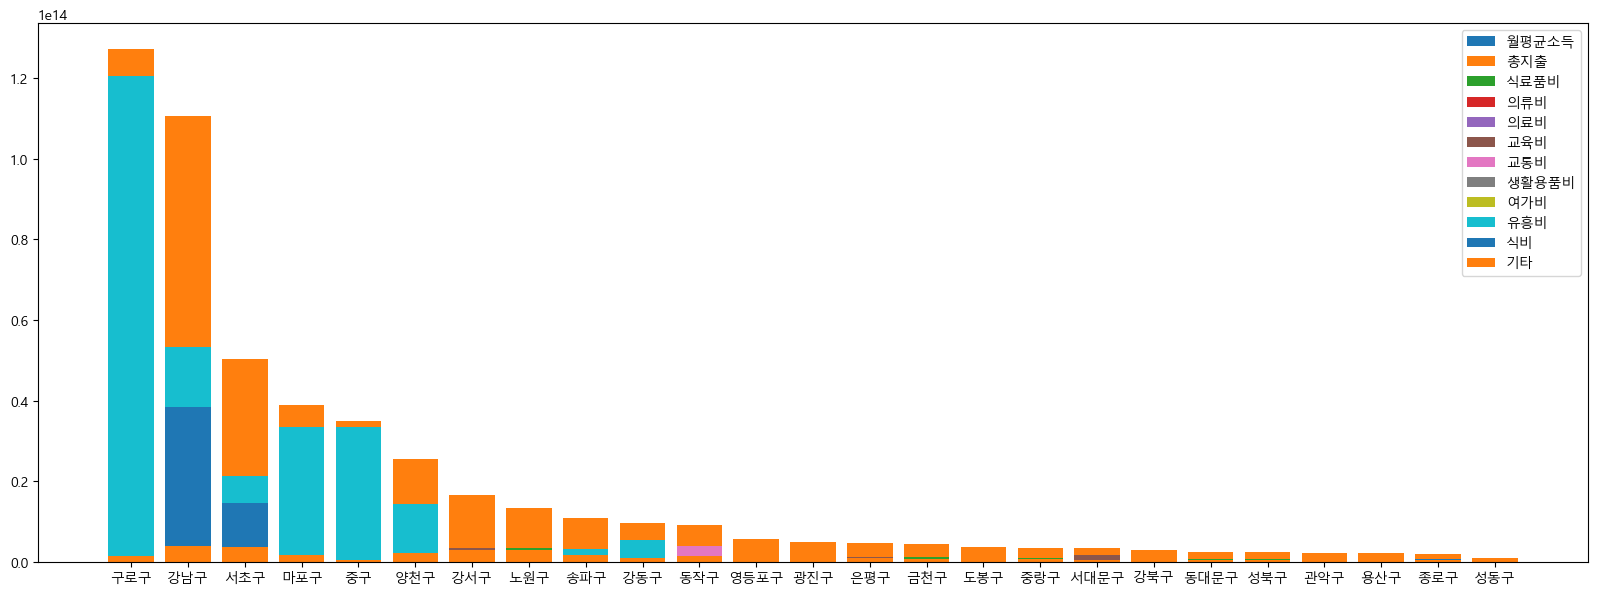

In [129]:
total = income.sort_values(by='총지출',ascending=False)
var = total.columns[1:]
plt.figure(figsize=(20,7))
for v in var:
    plt.bar(total['시군구명'],total[f'{v}'],label=f'{v}')

plt.legend()
plt.show()

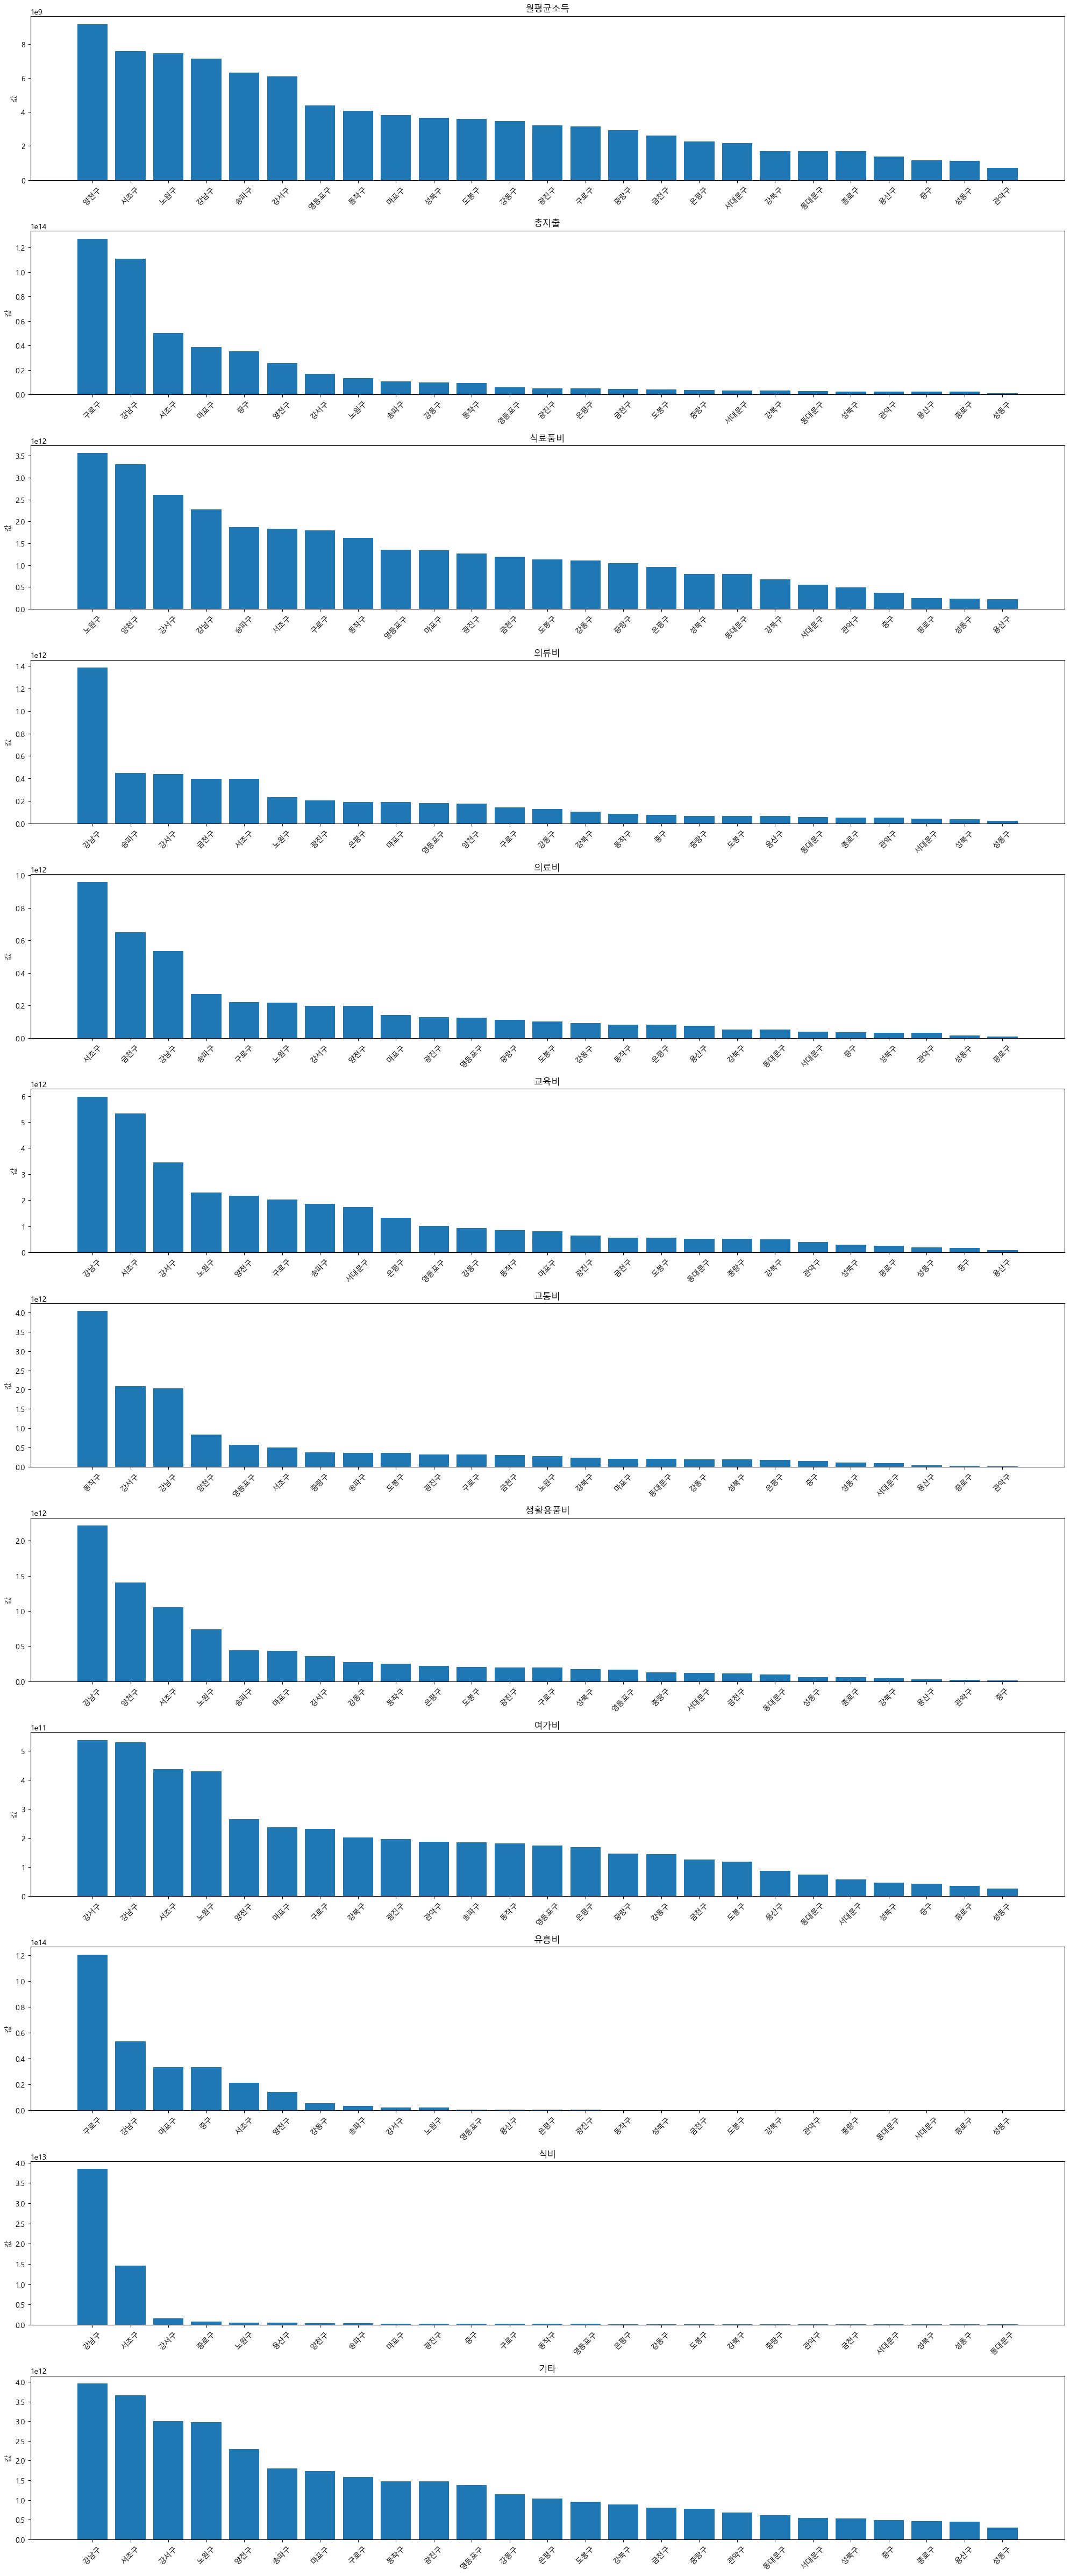

In [137]:
cols = income.columns[1:]  # 시군구명 제외한 변수들
n = len(cols)

plt.figure(figsize=(20, 4*n))

for i, col in enumerate(cols, 1):
    # 정렬
    sorted_df = income.sort_values(by=col, ascending=False)

    plt.subplot(n, 1, i)  # n행 1열 중 i번째
    plt.bar(sorted_df['시군구명'], sorted_df[col])
    plt.title(col)
    plt.xticks(rotation=45)
    plt.ylabel("값")

plt.tight_layout()
plt.show()

# 범죄

In [133]:
crime.tail()

,시군구명,강간,강제추행,기타 강간 강제추행등,살인미수등,살인기수,성풍속범죄,유사강간
20,용산구,45,195,0,2,1,127,4
21,은평구,30,112,1,5,2,159,7
22,종로구,25,204,0,1,2,123,10
23,중구,30,182,0,3,0,108,4
24,중랑구,40,118,0,2,4,122,9


## 성풍속범죄

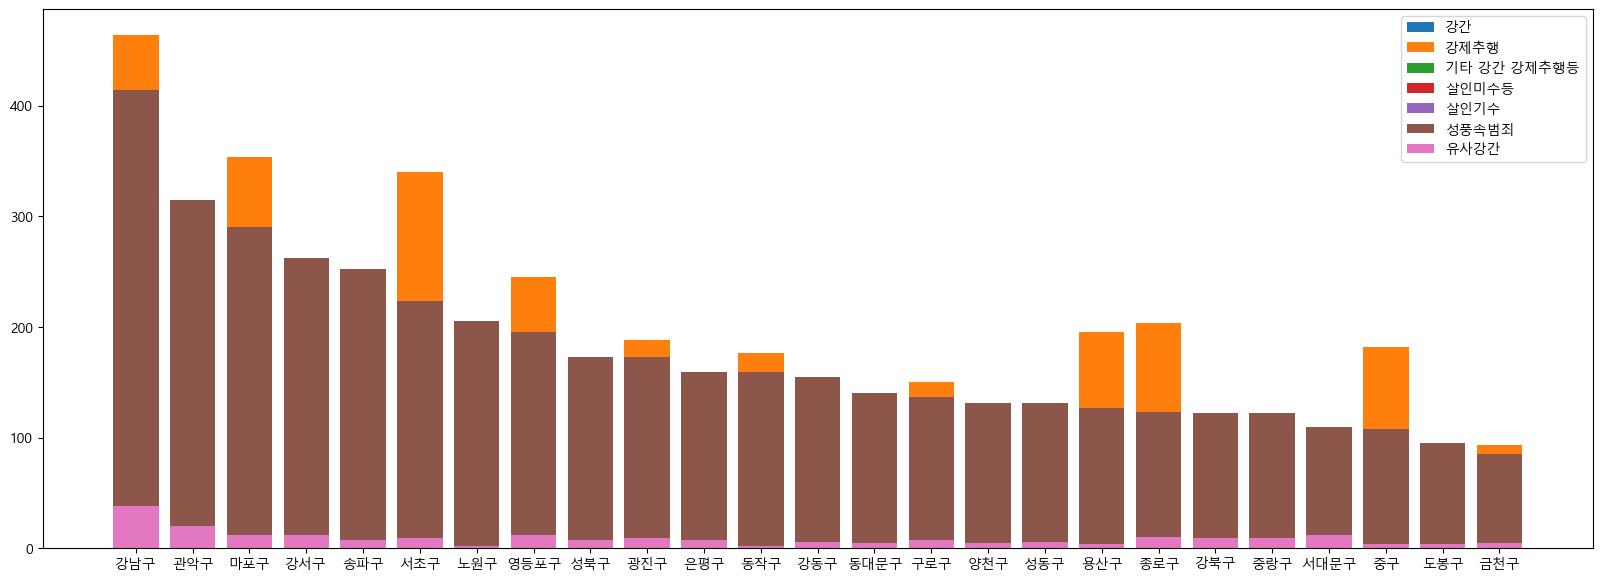

In [135]:
ls = crime.sort_values(by='성풍속범죄',ascending=False)
var = ls.columns[1:]
plt.figure(figsize=(20,7))
for v in var:
    plt.bar(ls['시군구명'],ls[f'{v}'],label=f'{v}')

plt.legend()
plt.show()

## 강제추행

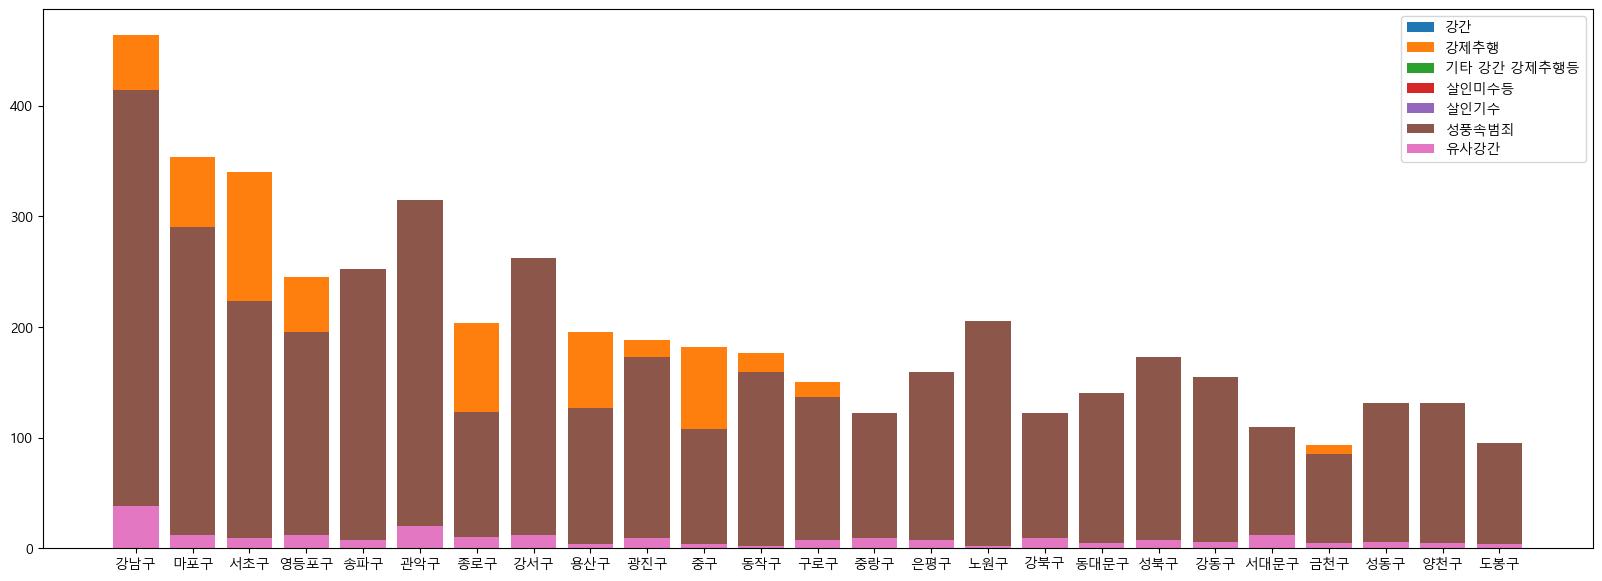

In [136]:
hs = crime.sort_values(by='강제추행',ascending=False)
var = hs.columns[1:]
plt.figure(figsize=(20,7))
for v in var:
    plt.bar(hs['시군구명'],hs[f'{v}'],label=f'{v}')

plt.legend()
plt.show()

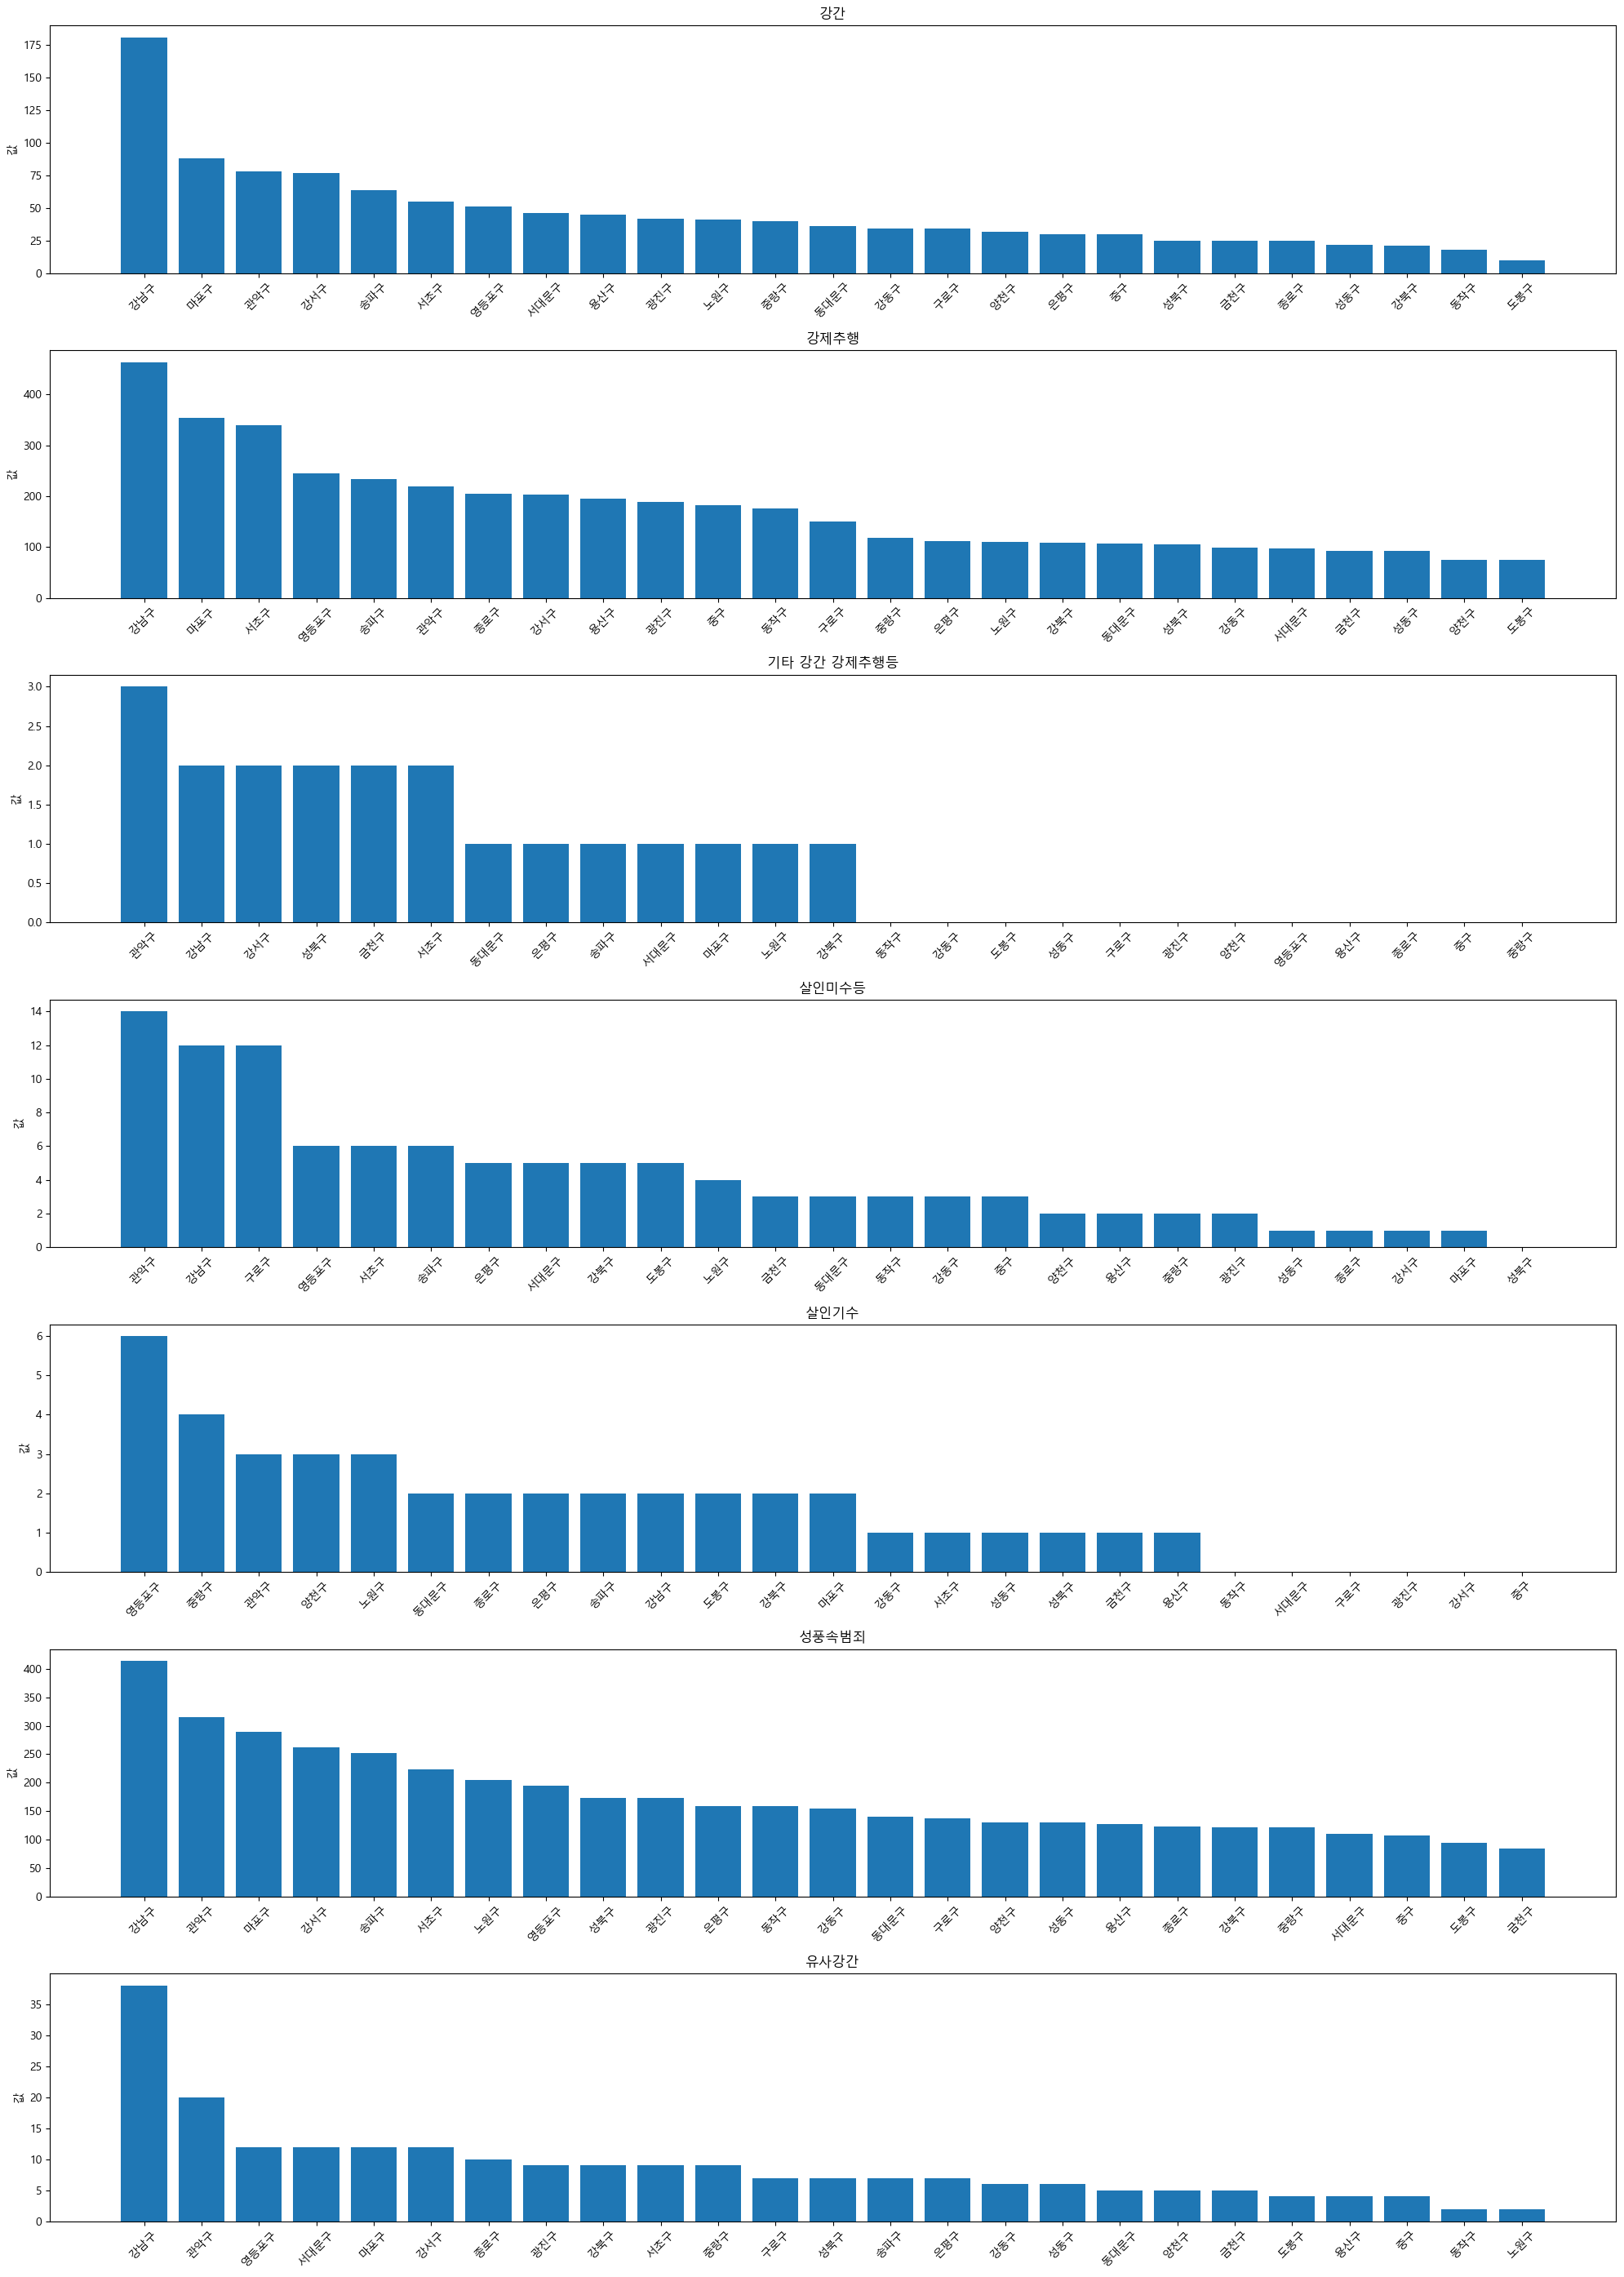

In [138]:
cols = crime.columns[1:]  # 시군구명 제외한 변수들
n = len(cols)

plt.figure(figsize=(20, 4*n))

for i, col in enumerate(cols, 1):
    # 정렬
    sorted_df = crime.sort_values(by=col, ascending=False)

    plt.subplot(n, 1, i)  # n행 1열 중 i번째
    plt.bar(sorted_df['시군구명'], sorted_df[col])
    plt.title(col)
    plt.xticks(rotation=45)
    plt.ylabel("값")

plt.tight_layout()
plt.show()

# 소음

In [139]:
noise.tail()

,시군구명,환경관련 전체민원,소음진동 민원
20,관악구,2080,1865
21,서초구,5081,4386
22,강남구,13153,9236
23,송파구,3227,2421
24,강동구,3006,2606


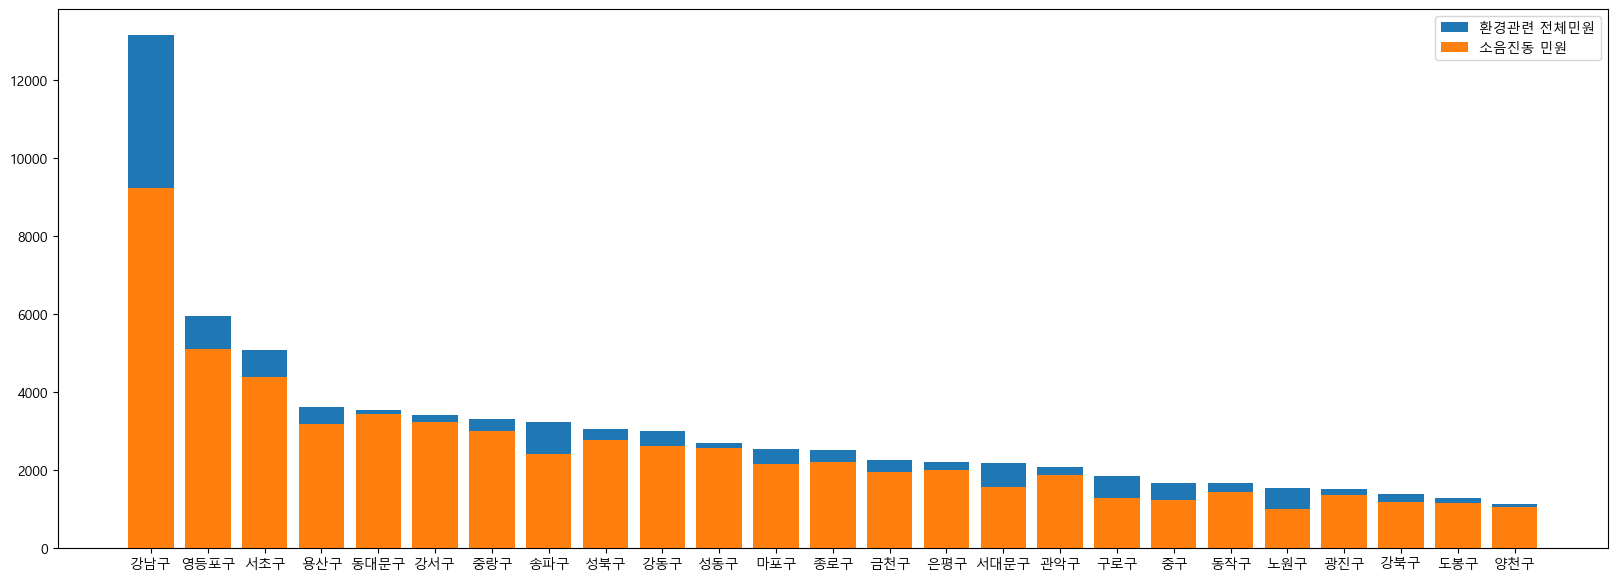

In [141]:
eco = noise.sort_values(by='환경관련 전체민원',ascending=False).reset_index(drop=True)
var = eco.columns[1:]
plt.figure(figsize=(20,7))
for v in var:
    plt.bar(eco['시군구명'],eco[f'{v}'],label=f'{v}')

plt.legend()
plt.show()

In [ ]:
# 환경관련민원이 용산구가 동대문구보다 높은데
# 소음관련민원은 동대문구 > 용산구 
# 동대문구에서 소음관련민원은 어떤 유형이 많을까? 왜 많을까? 주점이 많나? 학교가 많나? 번화가인가? 차를 이용하는 사람이 많나?

# 안전

In [142]:
safe.tail()

,시군구명,CCTV 총계,소방서수,클럽,주점,룸살롱,가로등수
20,용산구,3609,7,4,2,9,1511
21,은평구,5683,8,5,11,60,6
22,종로구,2339,8,10,9,108,10
23,중구,3118,8,8,33,79,43
24,중랑구,5392,6,3,0,14,735


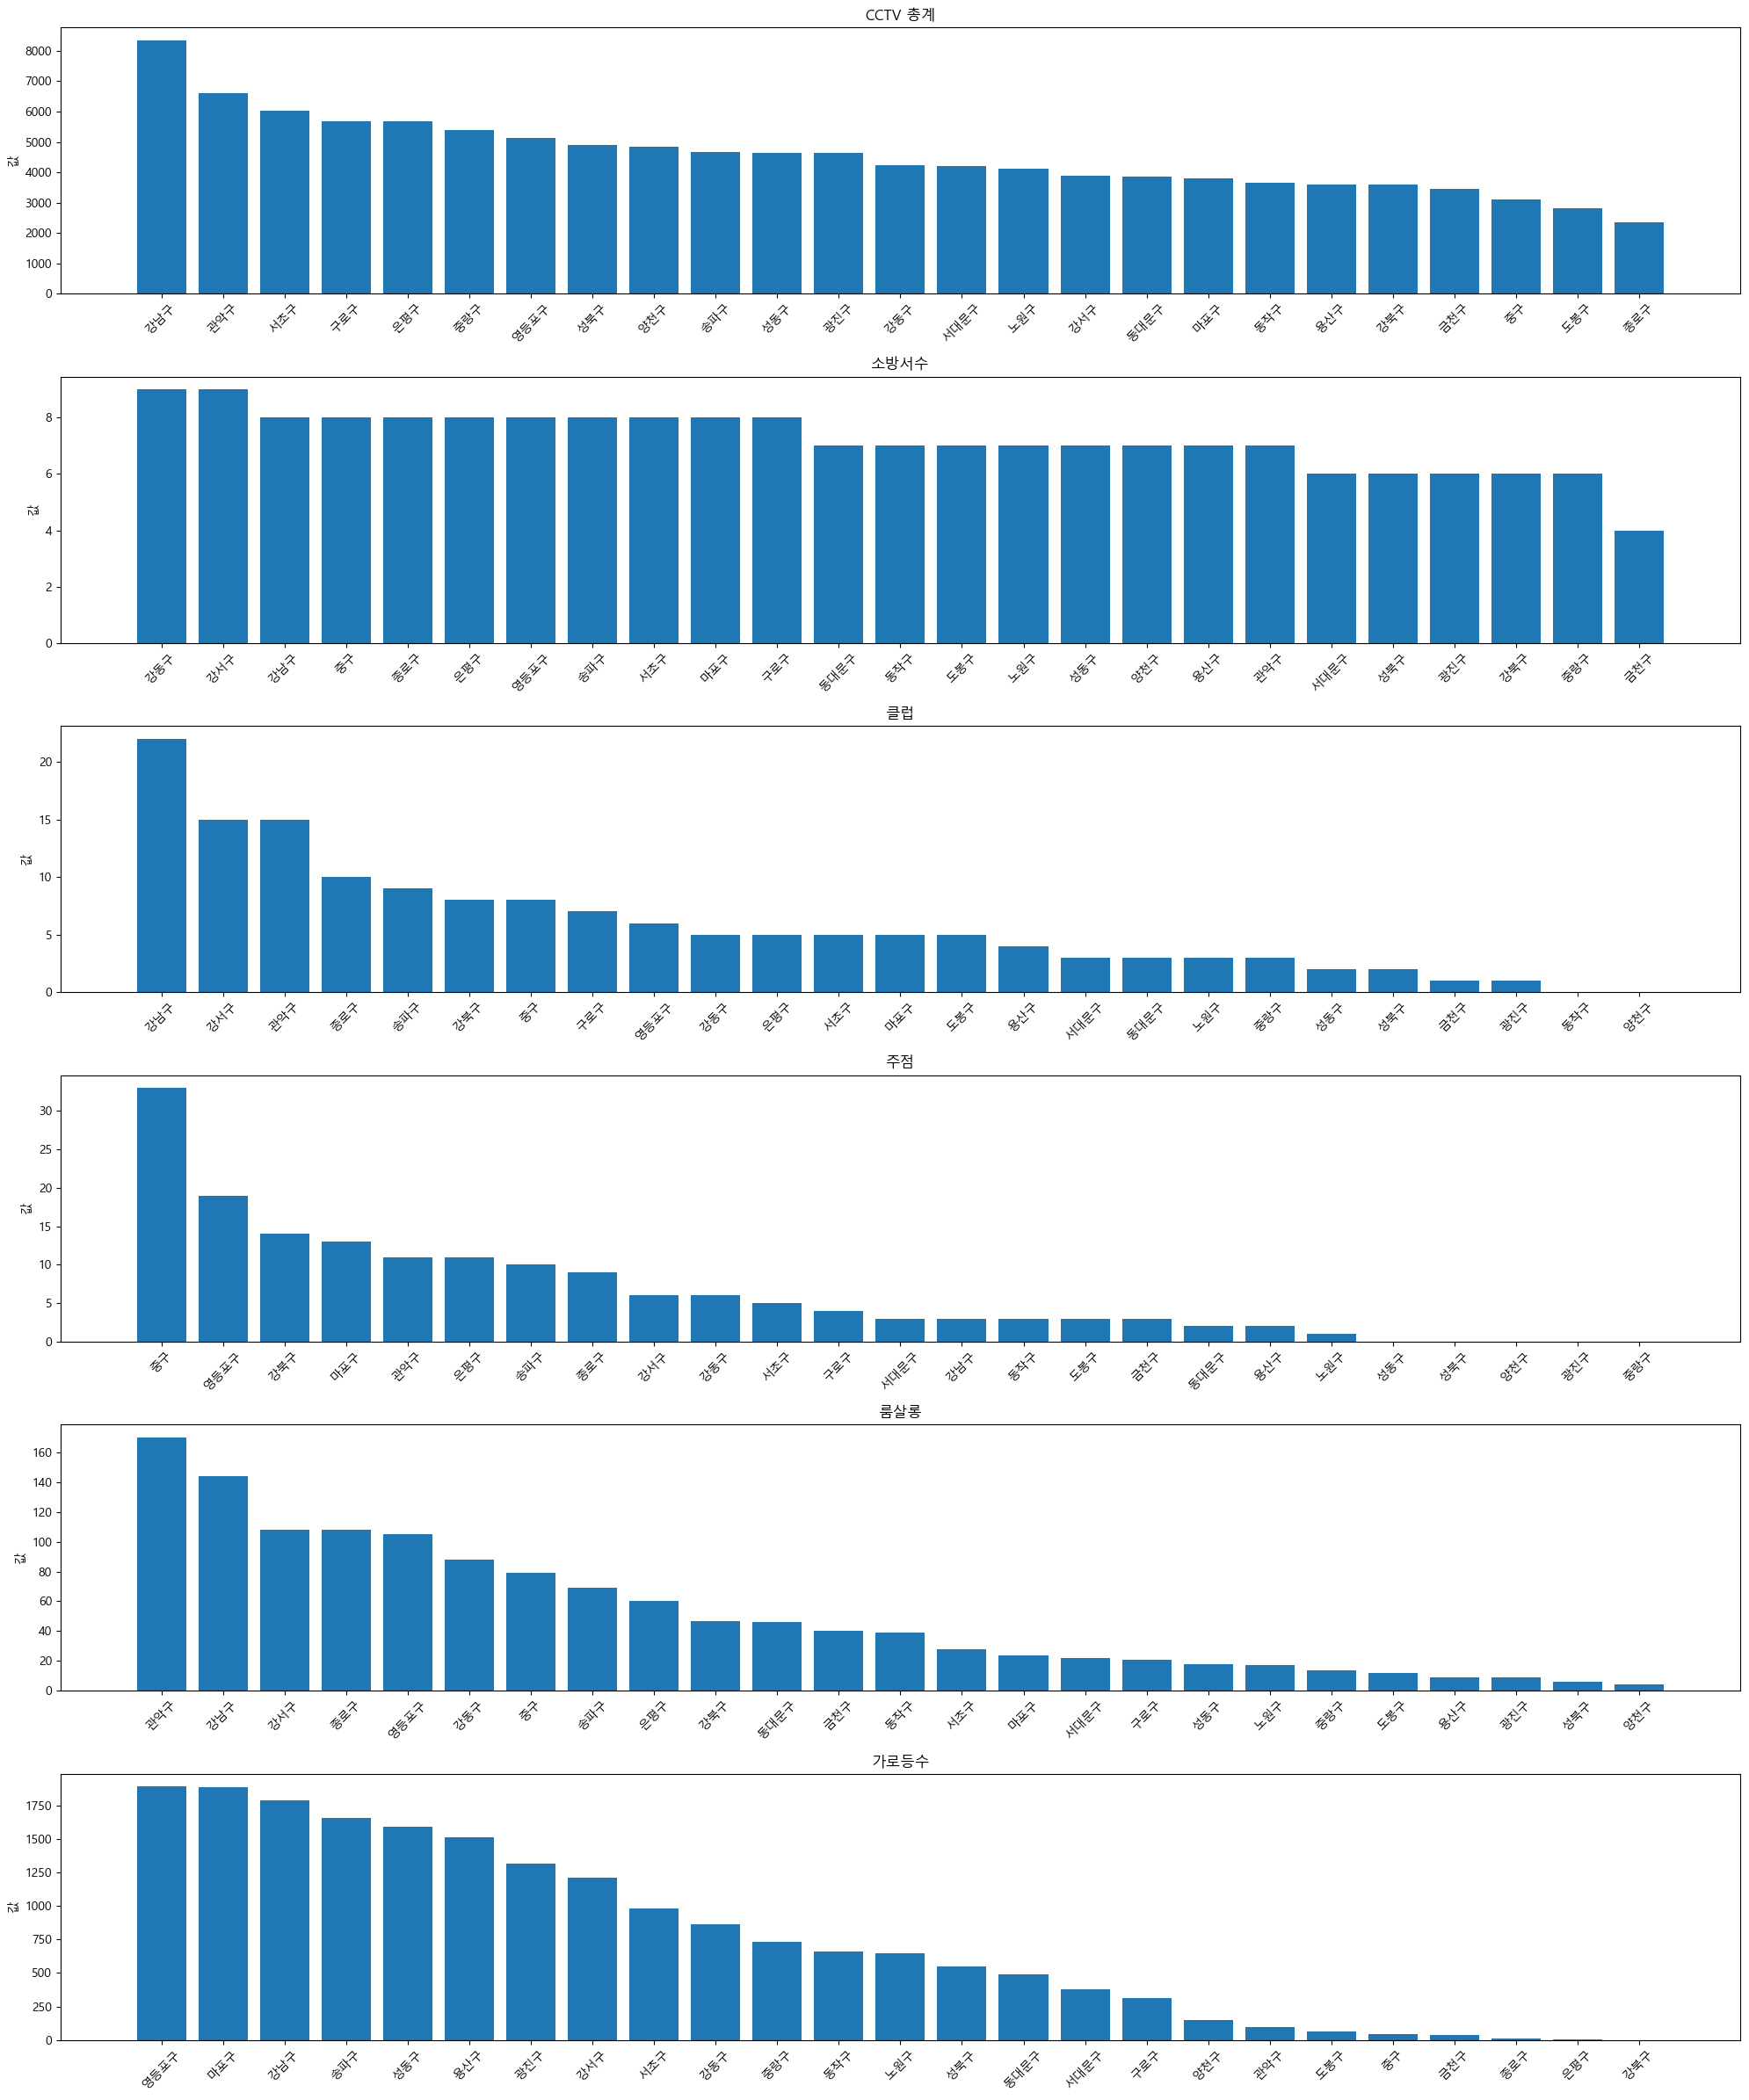

In [144]:
cols = safe.columns[1:]  # 시군구명 제외한 변수들
n = len(cols)

plt.figure(figsize=(20, 4*n))

for i, col in enumerate(cols, 1):
    # 정렬
    sorted_df = safe.sort_values(by=col, ascending=False)

    plt.subplot(n, 1, i)  # n행 1열 중 i번째
    plt.bar(sorted_df['시군구명'], sorted_df[col])
    plt.title(col)
    plt.xticks(rotation=45)
    plt.ylabel("값")

plt.tight_layout()
plt.show()

In [ ]:
# 룸살롱이 관악구에 제일 많네
# 구로구가 유흥비로 가장 높은데 주점은 중구가 가장 높네
# 구로구에 회사가 많아서 비용이 높은 곳이 많나?
# 관악구에 클럽도 많구나
# 강남구가 범죄율이 높아서 cctv 수가 제일 많나
# cctv가 많다고 해서 살기 좋은 동네는 아니구나, 많은덴 이유가 있다


# 교통

In [146]:
traffic.tail()

,시군구명,출근시간 지하철 승객수,퇴근시간 지하철 승객수
20,용산구,17808807,50888645
21,은평구,60446965,25839720
22,종로구,18257321,128026151
23,중구,38569075,193386742
24,중랑구,40002919,17864491


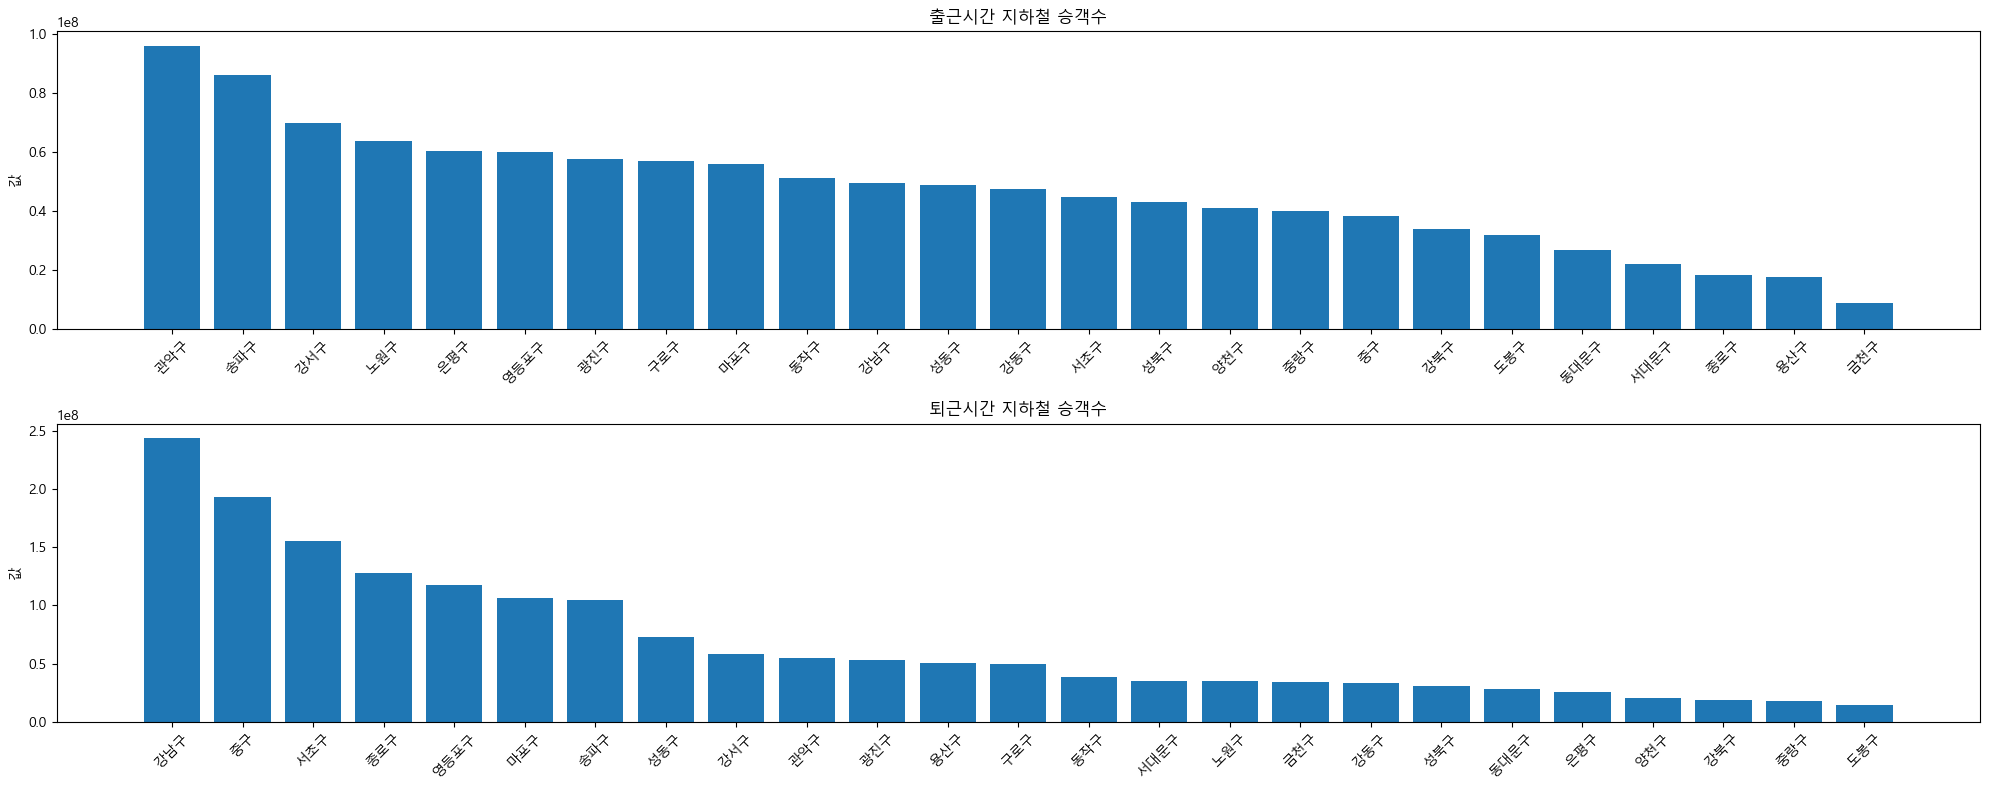

In [147]:
cols = traffic.columns[1:]  # 시군구명 제외한 변수들
n = len(cols)

plt.figure(figsize=(20, 4*n))

for i, col in enumerate(cols, 1):
    # 정렬
    sorted_df = traffic.sort_values(by=col, ascending=False)

    plt.subplot(n, 1, i)  # n행 1열 중 i번째
    plt.bar(sorted_df['시군구명'], sorted_df[col])
    plt.title(col)
    plt.xticks(rotation=45)
    plt.ylabel("값")

plt.tight_layout()
plt.show()

In [ ]:
# 어디로 퇴근하는 사람이 관악구에 많이 살까
# 강남구는 퇴근도 가장 많고 성범죄율도 가장 높고 클럽도 많고 유흥비도 높고
# 유흥비가 가장 높은 곳은 구로구인데 구로구는 출근 비율 > 퇴근 비율
# 양천구는 월평균소득이 가장 높은데 출근시간 지하철 승객수가 비교적 적은걸 보니 자차를 많이 이용할 수도
